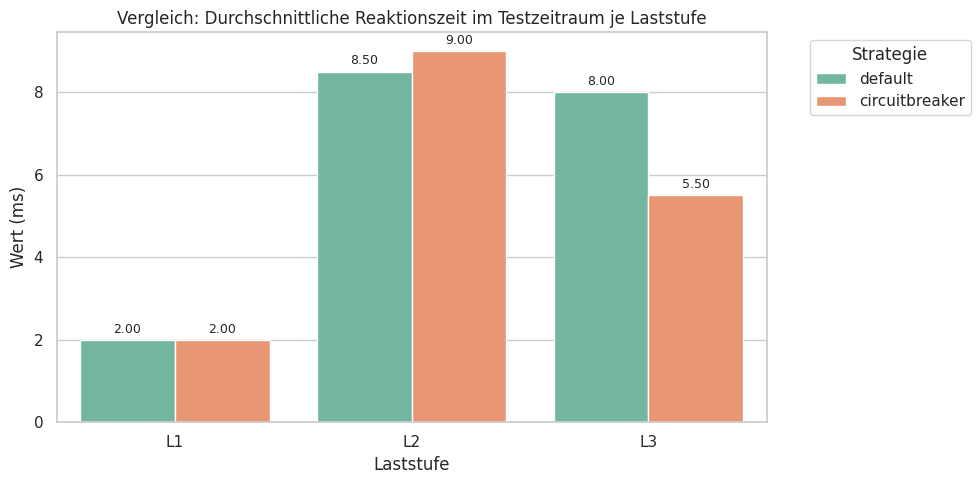

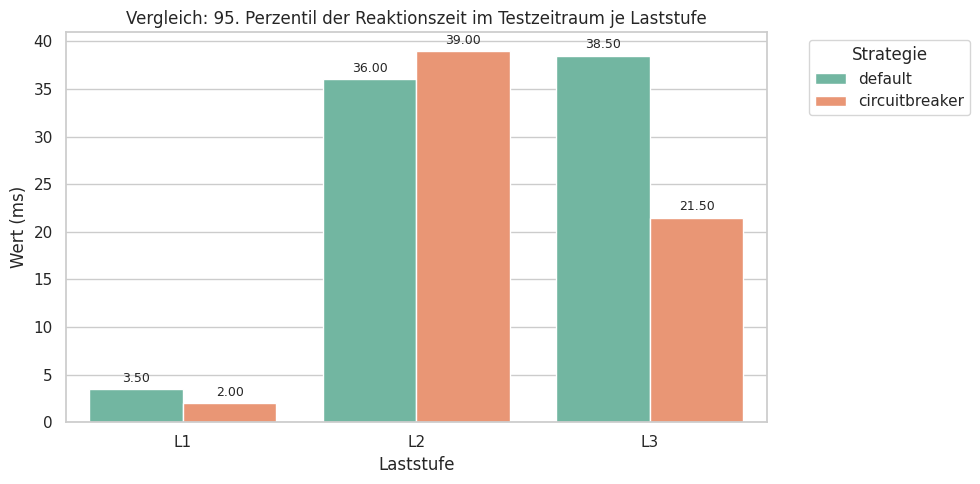

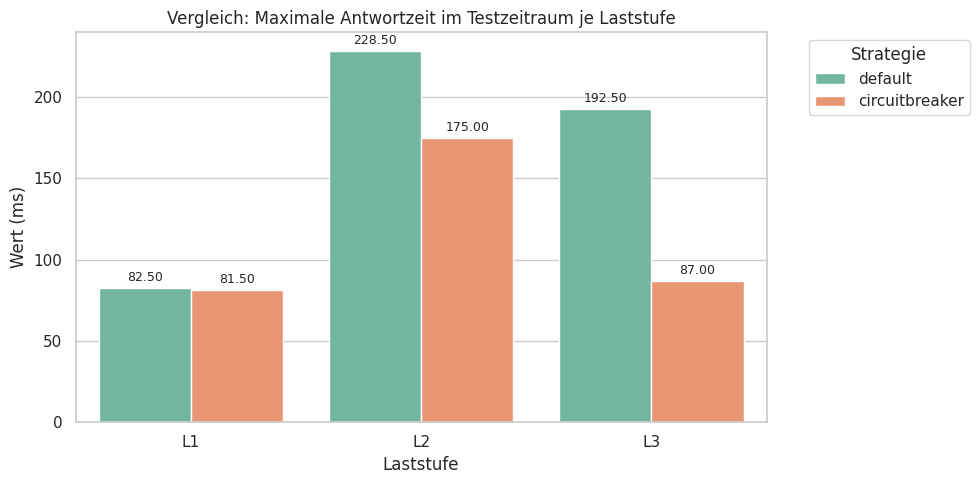

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== Hilfsfunktionen ==========

def extract_numeric_and_unit(wert_str):
    try:
        parts = wert_str.strip().split()
        if len(parts) == 2:
            number = float(parts[0].replace(",", "."))
            unit = parts[1].strip()
            return number, unit
        else:
            return None, ""
    except Exception:
        return None, ""

def get_scaling(einheit):
    einheit = einheit.lower()
    if einheit == "s":
        return "ms", 1000
    elif einheit == "ms":
        return "ms", 1
    elif einheit == "µs":
        return "µs", 1
    else:
        return einheit, 1

def load_and_label(filepath, strategie_name):
    df = pd.read_csv(filepath)
    df["Strategie"] = strategie_name
    return df

# ========== CSV-Dateien laden ==========

df_default = load_and_label("metriken_reaktionszeit_default.csv", "default")
df_cb = load_and_label("metriken_reaktionszeit_cb.csv", "circuitbreaker")
df = pd.concat([df_default, df_cb], ignore_index=True)

# ========== Wert & Einheit extrahieren ==========

df[["Wert_Numerisch", "Einheit"]] = df["Wert"].apply(lambda x: pd.Series(extract_numeric_and_unit(str(x))))

# ========== Umrechnung aller Werte in ms ==========

def convert_to_ms(row):
    einheit = row["Einheit"]
    nummerisch = row["Wert_Numerisch"]
    ziel_einheit, faktor = get_scaling(einheit)
    return nummerisch * faktor if nummerisch is not None else None

df["Wert_ms"] = df.apply(convert_to_ms, axis=1)

# ========== Visualisierung ==========

sns.set(style="whitegrid")

for metric in df["Metrik"].unique():
    plot_df = df[df["Metrik"] == metric].copy()
    if plot_df.empty:
        continue

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        data=plot_df,
        x="Laststufe",
        y="Wert_ms",
        hue="Strategie",
        errorbar=None,  # ersetzt deprecated `ci=None`
        palette="Set2"
    )

    # Balkenbeschriftung
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=9, padding=3)

    # Titel und Achsen
    plt.title(f"Vergleich: {metric} je Laststufe")
    plt.xlabel("Laststufe")
    plt.ylabel("Wert (ms)")
    plt.legend(title="Strategie", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


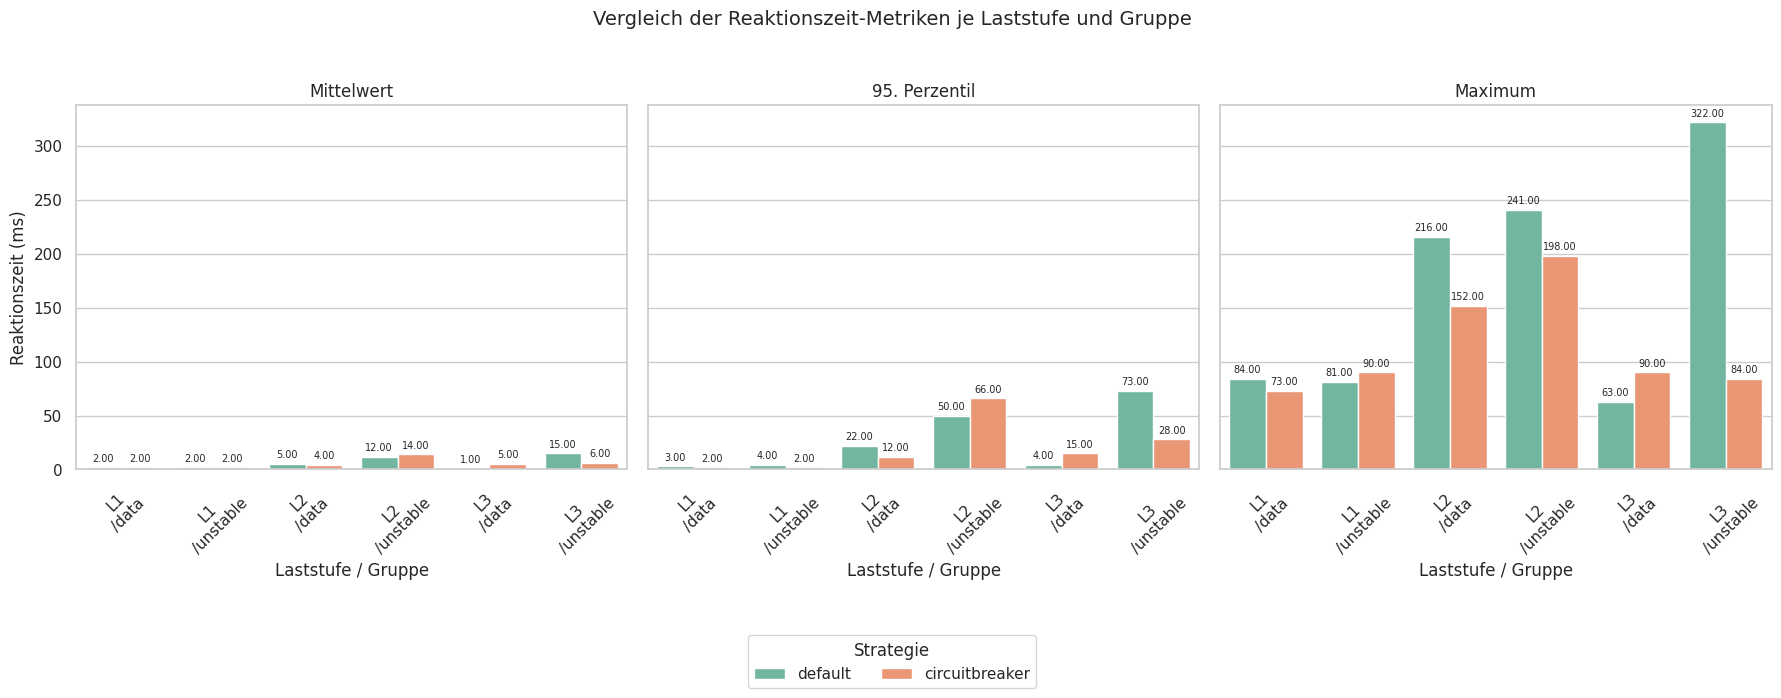

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== Hilfsfunktionen ==========

def extract_numeric_and_unit(wert_str):
    try:
        parts = wert_str.strip().split()
        if len(parts) == 2:
            number = float(parts[0].replace(",", "."))
            unit = parts[1].strip()
            return number, unit
        else:
            return None, ""
    except Exception:
        return None, ""

def get_scaling(einheit):
    einheit = einheit.lower()
    if einheit == "s":
        return "ms", 1000
    elif einheit == "ms":
        return "ms", 1
    elif einheit == "µs":
        return "µs", 1
    else:
        return einheit, 1

def load_and_label(filepath, strategie_name):
    df = pd.read_csv(filepath)
    df["Strategie"] = strategie_name
    return df

# ========== CSV-Dateien laden ==========

df_default = load_and_label("metriken_reaktionszeit_default.csv", "default")
df_cb = load_and_label("metriken_reaktionszeit_cb.csv", "circuitbreaker")
df = pd.concat([df_default, df_cb], ignore_index=True)

# ========== Wert & Einheit extrahieren ==========

df[["Wert_Numerisch", "Einheit"]] = df["Wert"].apply(lambda x: pd.Series(extract_numeric_and_unit(str(x))))

# ========== Umrechnung aller Werte in ms ==========

def convert_to_ms(row):
    einheit = row["Einheit"]
    nummerisch = row["Wert_Numerisch"]
    ziel_einheit, faktor = get_scaling(einheit)
    return nummerisch * faktor if nummerisch is not None else None

df["Wert_ms"] = df.apply(convert_to_ms, axis=1)

# ========== Gruppierung und Achsentext erzeugen ==========

df["Metrik_kurz"] = df["Metrik"].replace({
    "Durchschnittliche Reaktionszeit im Testzeitraum": "Mittelwert",
    "95. Perzentil der Reaktionszeit im Testzeitraum": "95. Perzentil",
    "Maximale Antwortzeit im Testzeitraum": "Maximum"
})

# ========== Visualisierung im Subplot-Stil ohne Einzel-Legenden ==========

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

metrik_order = ["Mittelwert", "95. Perzentil", "Maximum"]

for i, metrik in enumerate(metrik_order):
    subset = df[df["Metrik_kurz"] == metrik].copy()
    subset["Achse"] = subset["Laststufe"] + "\n" + subset["Gruppe"]
    ax = axes[i]
    sns.barplot(data=subset, x="Achse", y="Wert_ms", hue="Strategie", palette="Set2", errorbar=None, ax=ax)
    ax.set_title(metrik)
    ax.set_xlabel("Laststufe / Gruppe")
    if i == 0:
        ax.set_ylabel("Reaktionszeit (ms)")
    else:
        ax.set_ylabel("")
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=7, padding=3)
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove()  # <<< Entfernt Legende in jedem Subplot

plt.suptitle("Vergleich der Reaktionszeit-Metriken je Laststufe und Gruppe", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Strategie", loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.05))
plt.show()



/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


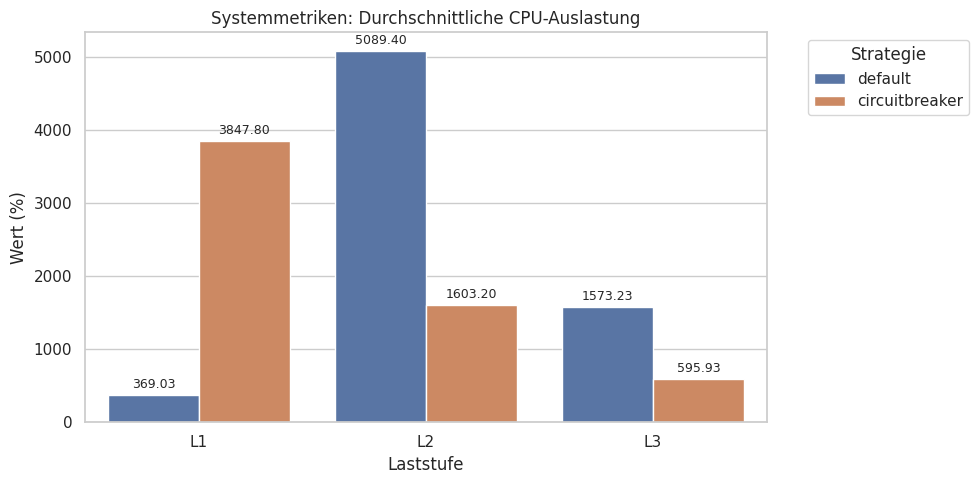

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


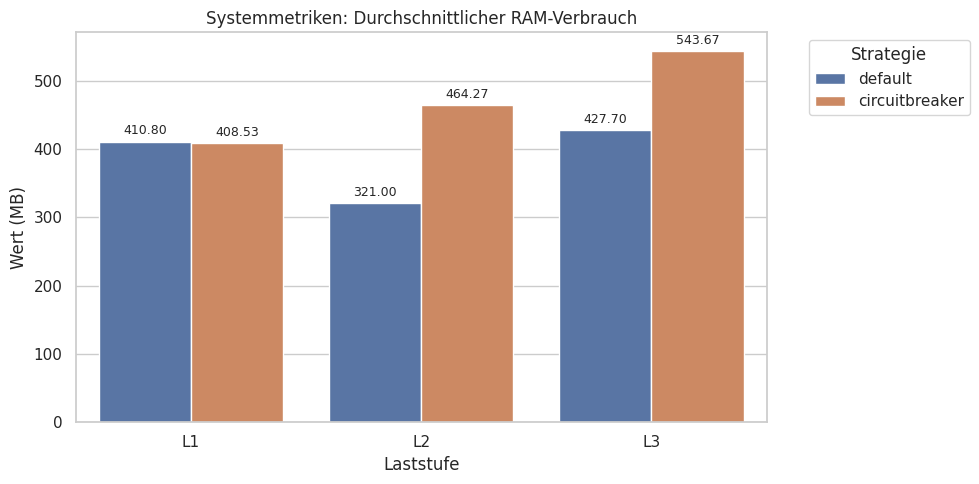

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


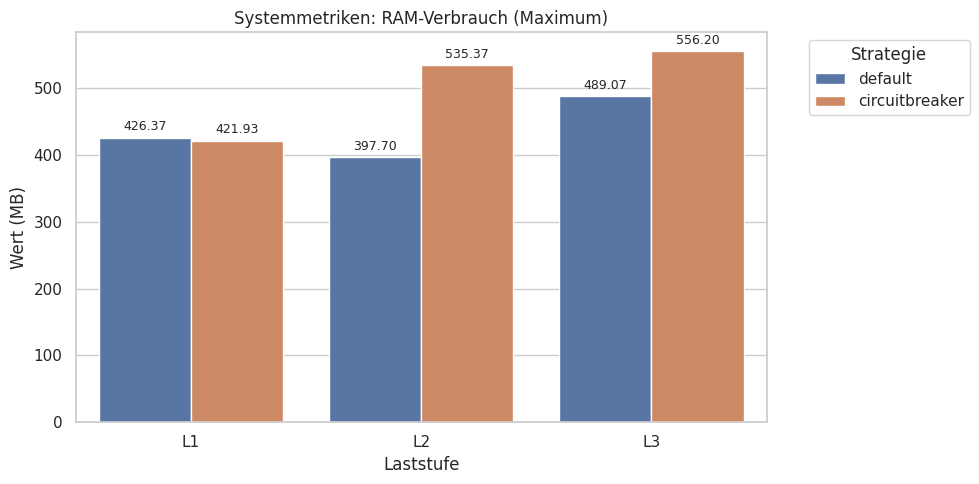

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


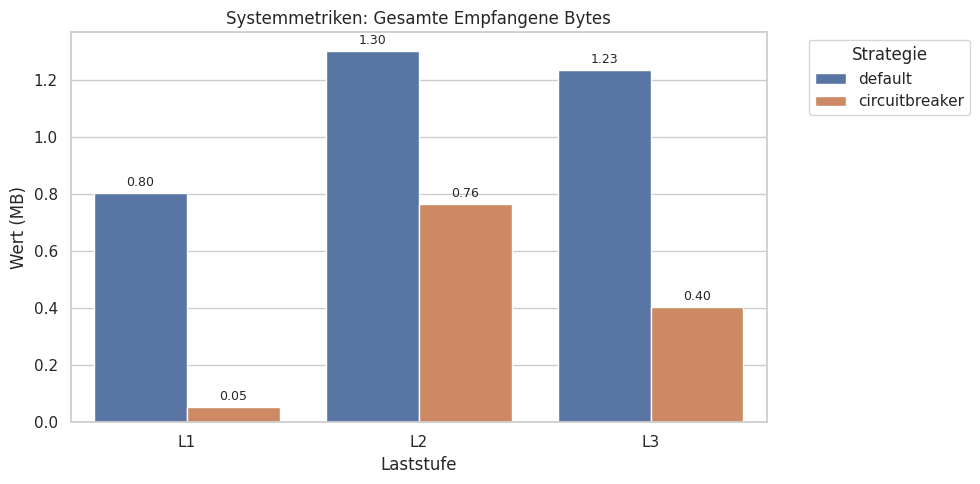

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


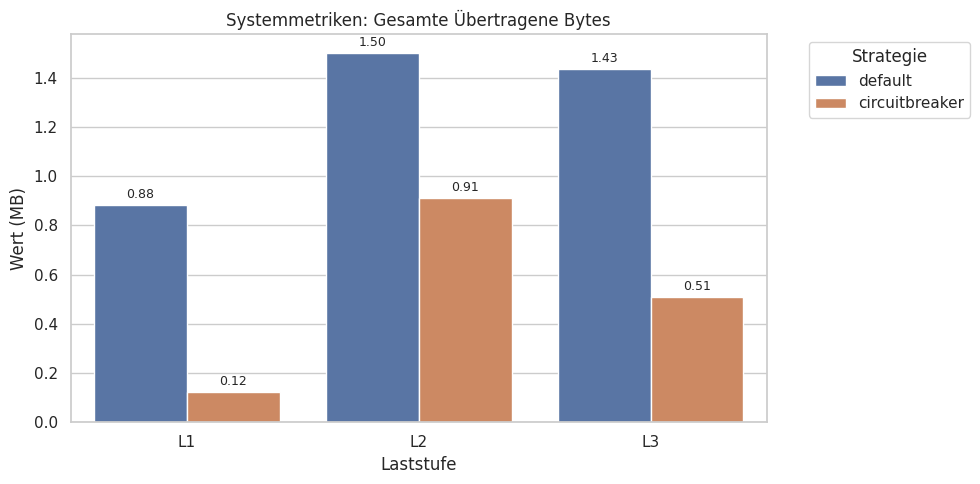

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


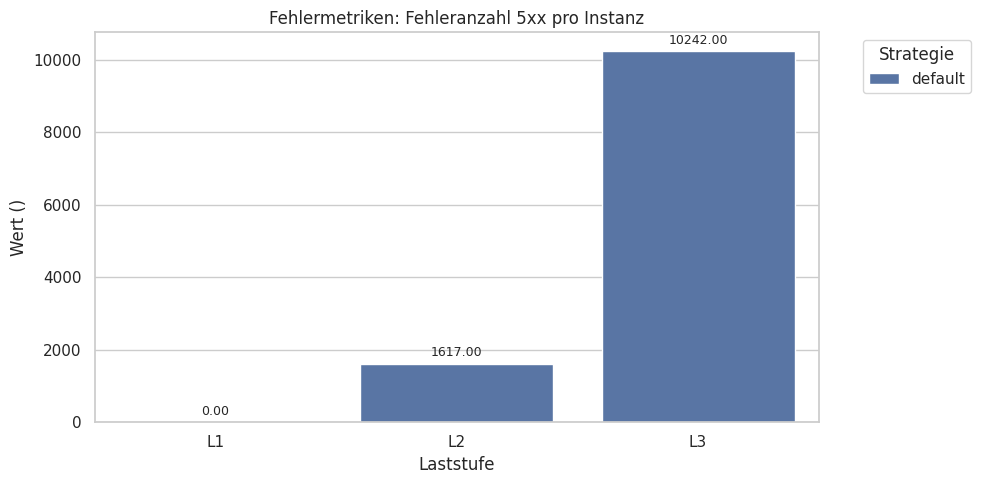

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


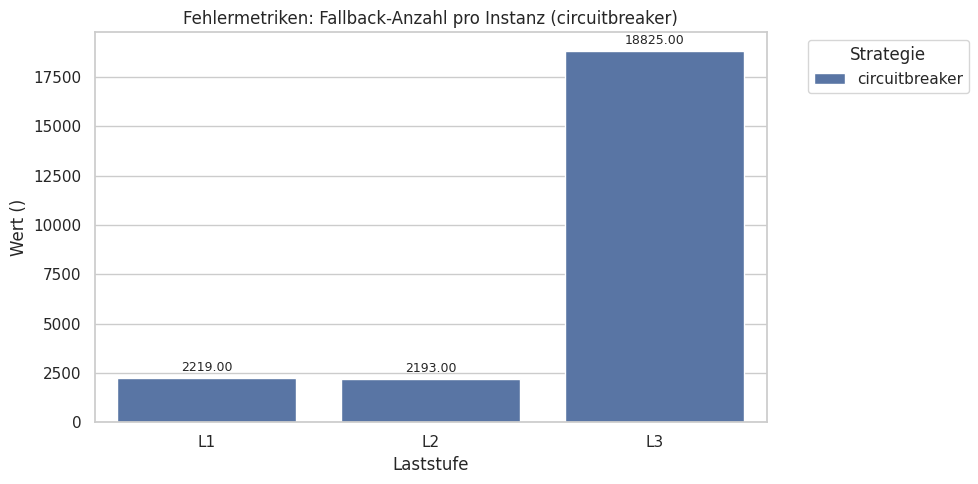

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


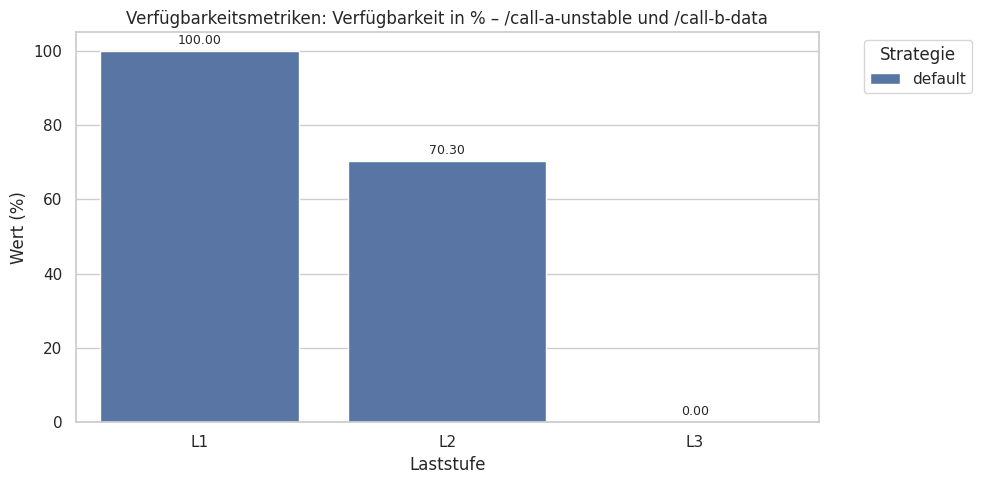

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


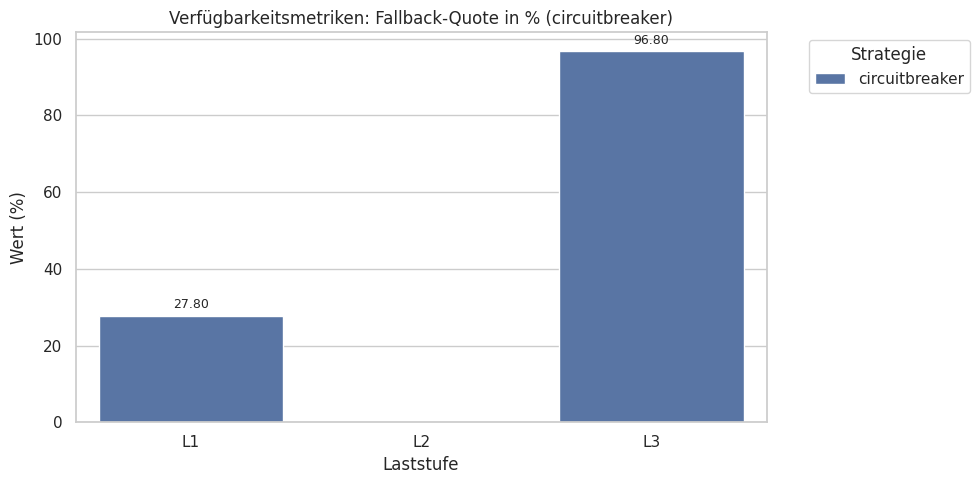

/tmp/ipykernel_99589/2494878371.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


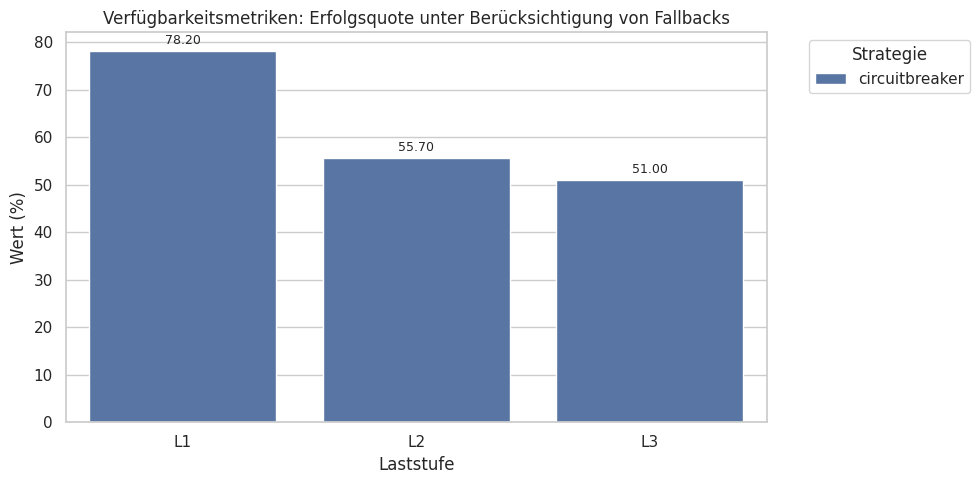

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== Hilfsfunktionen ==========

def extract_numeric_and_unit(wert_str):
    try:
        parts = wert_str.strip().split()
        if len(parts) == 2:
            number = float(parts[0].replace(",", ".").replace("inf", "nan"))
            unit = parts[1].strip()
            return number, unit
        elif len(parts) == 1:
            return float(parts[0].replace(",", ".")), ""
        else:
            return None, ""
    except:
        return None, ""

def get_scaling(einheit):
    einheit = einheit.lower()
    if einheit == "mb":
        return "MB", 1
    elif einheit == "kb":
        return "MB", 1 / 1024
    elif einheit == "gb":
        return "MB", 1024
    elif einheit == "%":
        return "%", 1
    else:
        return einheit, 1

def load_and_label(filepath, strategie_name):
    df = pd.read_csv(filepath)
    df["Strategie"] = strategie_name
    return df

def preprocess(df):
    df[["Wert_Numerisch", "Einheit"]] = df["Wert"].apply(lambda x: pd.Series(extract_numeric_and_unit(str(x))))
    df["Wert_umgerechnet"] = df.apply(
        lambda row: row["Wert_Numerisch"] * get_scaling(row["Einheit"])[1] if pd.notnull(row["Wert_Numerisch"]) else None,
        axis=1
    )
    return df

# ========== CSV-Dateien laden ==========
df_default = load_and_label("metriken_rest_default.csv", "default")
df_cb = load_and_label("metriken_rest_cb.csv", "circuitbreaker")
df = pd.concat([df_default, df_cb], ignore_index=True)
df = preprocess(df)

# ========== Gruppierung der Metriken ==========
metriken_kategorien = {
    "Systemmetriken": [
        "Durchschnittliche CPU-Auslastung",
        "Durchschnittlicher RAM-Verbrauch",
        "RAM-Verbrauch (Maximum)",
        "Gesamte Empfangene Bytes",
        "Gesamte Übertragene Bytes"
    ],
    "Fehlermetriken": [
        "Fehleranzahl 5xx pro Instanz",
        "Fallback-Anzahl pro Instanz (circuitbreaker)"
    ],
    "Verfügbarkeitsmetriken": [
        "Verfügbarkeit in % – /call-a-unstable und /call-b-data",
        "Fallback-Quote in % (circuitbreaker)",
        "Erfolgsquote unter Berücksichtigung von Fallbacks"
    ]
}

# ========== Visualisierung ==========
sns.set(style="whitegrid")

for kategorie, metriken in metriken_kategorien.items():
    for metrik in metriken:
        plot_df = df[df["Metrik"] == metrik].copy()
        if plot_df.empty:
            continue

        y_einheit = get_scaling(plot_df["Einheit"].mode()[0])[0]

        plt.figure(figsize=(10, 5))
        ax = sns.barplot(
            data=plot_df,
            x="Laststufe",
            y="Wert_umgerechnet",
            hue="Strategie",
            ci=None,
            errorbar=None
        )

        # Balkenbeschriftung
        for container in ax.containers:
            ax.bar_label(container, fmt="%.2f", fontsize=9, padding=3)

        plt.title(f"{kategorie}: {metrik}")
        plt.xlabel("Laststufe")
        plt.ylabel(f"Wert ({y_einheit})")
        plt.legend(title="Strategie", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


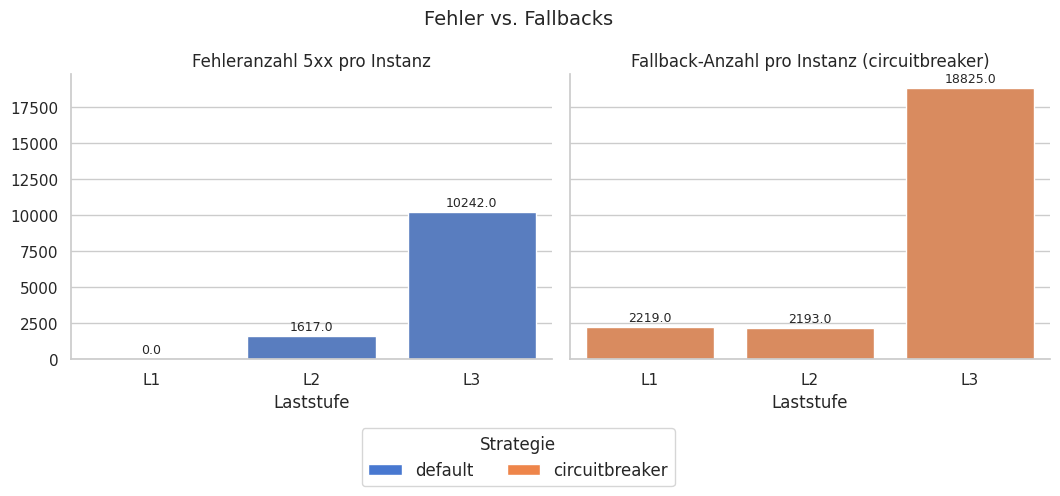

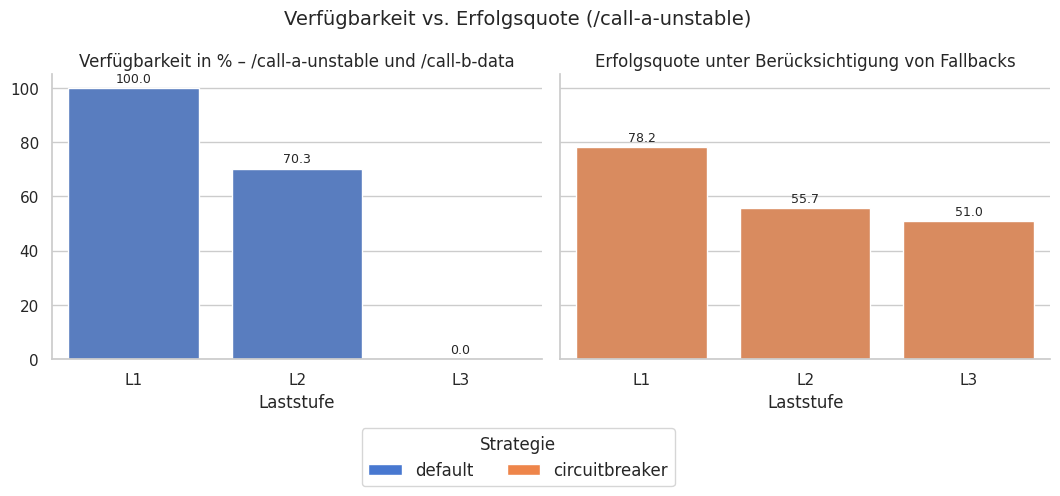

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# ===== Hilfsfunktionen =====
def extract_numeric_and_unit(wert_str):
    try:
        parts = wert_str.strip().split()
        if len(parts) == 2:
            number = float(parts[0].replace(",", ".").replace("inf", "nan"))
            unit = parts[1].strip()
            return number, unit
        elif len(parts) == 1:
            return float(parts[0].replace(",", ".")), ""
        else:
            return None, ""
    except:
        return None, ""

def get_scaling(einheit):
    einheit = einheit.lower()
    if einheit == "mb":
        return "MB", 1
    elif einheit == "kb":
        return "MB", 1 / 1024
    elif einheit == "gb":
        return "MB", 1024
    elif einheit == "%":
        return "%", 1
    else:
        return einheit, 1

def load_and_label(filepath, strategie_name):
    df = pd.read_csv(filepath)
    df["Strategie"] = strategie_name
    return df

def preprocess(df):
    df[["Wert_Numerisch", "Einheit"]] = df["Wert"].apply(lambda x: pd.Series(extract_numeric_and_unit(str(x))))
    df["Wert_umgerechnet"] = df.apply(
        lambda row: row["Wert_Numerisch"] * get_scaling(row["Einheit"])[1] if pd.notnull(row["Wert_Numerisch"]) else None,
        axis=1
    )
    return df

# ===== Daten laden und vorbereiten =====
df_default = load_and_label("metriken_rest_default.csv", "default")
df_cb = load_and_label("metriken_rest_cb.csv", "circuitbreaker")
df = pd.concat([df_default, df_cb], ignore_index=True)
df = preprocess(df)

# ===== Vergleichspaare mit Plot-Titel =====
vergleichspaare = [
    ("Fehleranzahl 5xx pro Instanz", "Fallback-Anzahl pro Instanz (circuitbreaker)", "Fehler vs. Fallbacks"),
    ("Verfügbarkeit in % – /call-a-unstable und /call-b-data", "Erfolgsquote unter Berücksichtigung von Fallbacks", "Verfügbarkeit vs. Erfolgsquote (/call-a-unstable)")
]

# ===== Achsentexte =====
axis_label_mapping = {
    "Fehleranzahl 5xx pro Instanz": "Fehlerantworten (Anzahl)",
    "Fallback-Anzahl pro Instanz (circuitbreaker)": "Fallback-Zugriffe (Anzahl)",
    "Verfügbarkeit in % – /call-a-unstable und /call-b-data": "Erfolgreiche Aufrufe (%)",
    "Erfolgsquote unter Berücksichtigung von Fallbacks": "Erfolgsquote inkl. Fallbacks (%)"
}

# ===== Visualisierung mit manueller Legende =====
sns.set(style="whitegrid")

farben = {
    "default": sns.color_palette("muted")[0],
    "circuitbreaker": sns.color_palette("muted")[1]
}

for metrik1, metrik2, titel in vergleichspaare:
    df_sub = df[df["Metrik"].isin([metrik1, metrik2])].copy()
    if df_sub.empty:
        continue

    g = sns.catplot(
        data=df_sub,
        x="Laststufe",
        y="Wert_umgerechnet",
        hue="Strategie",
        col="Metrik",
        kind="bar",
        height=5,
        aspect=1.1,
        palette=farben,
        legend=False,  # Standard-Legende deaktivieren
        errorbar=None
    )

    for ax in g.axes.flat:
        metrik_name = ax.get_title().replace("Metrik = ", "")
        ax.set_ylabel(axis_label_mapping.get(metrik_name, "Wert"))
        for container in ax.containers:
            ax.bar_label(container, fmt="%.1f", fontsize=9, padding=2)

    g.set_titles("{col_name}")
    g.set_axis_labels("Laststufe", "")
    g.fig.suptitle(titel, fontsize=14)
    g.fig.subplots_adjust(top=0.85, bottom=0.28)

    # ===== Manuelle Legende erstellen =====
    handles = [Patch(facecolor=farben[key], label=key) for key in farben]
    g.fig.legend(
        handles=handles,
        loc="lower center",
        ncol=len(farben),
        title="Strategie",
        fontsize="medium",
        title_fontsize="medium",
        bbox_to_anchor=(0.5, 0.01)
    )

    plt.show()
